In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

from SketchVRNN  import VRNN
from sketch_util import draw_sketches
from sketch_util import mov_to_coord

In [2]:
# flags = {'anneal_klw': True,
#          'anneal_klw_start': 0.4, 
#          'anneal_klw_end':   1.0, 
#          'anneal_klw_steps':10000}
vrnn = VRNN(my_flags=None)

GPU Device in use: ''
Instructions for updating:
Create a `tf.sparse.SparseTensor` and use `tf.sparse.to_dense` instead.


From /usr/local/lib/python3.5/dist-packages/tensorflow/python/ops/sparse_ops.py:1165: sparse_to_dense (from tensorflow.python.ops.sparse_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Create a `tf.sparse.SparseTensor` and use `tf.sparse.to_dense` instead.


In [3]:
psamples_op, plengths_op = vrnn.psample(threshold_penup=0.3)

In [4]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    sess.run(tf.tables_initializer())
    vrnn.restore_latest(sess)
    
    psamples, plengths = sess.run([psamples_op, plengths_op])

INFO:tensorflow:Restoring parameters from ../checkpts/VRNNv9_hs2x512_anneal-lr_maxlen150_kldw1.0_trainTogether_annealKL-from0.4-end1.0-steps10000_cln-hidden+latent/checkpoint-77999


Restoring parameters from ../checkpts/VRNNv9_hs2x512_anneal-lr_maxlen150_kldw1.0_trainTogether_annealKL-from0.4-end1.0-steps10000_cln-hidden+latent/checkpoint-77999


Values were restored (scope: None)


In [5]:
psketch_coord = mov_to_coord(psamples, max_len=50, lengths=[50]*30)

/usr/local/lib/python3.5/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


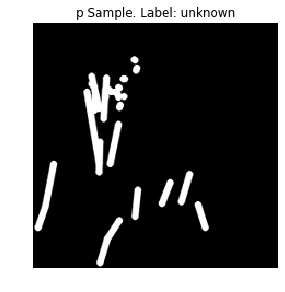

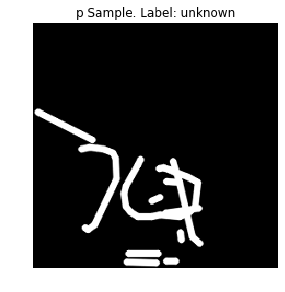

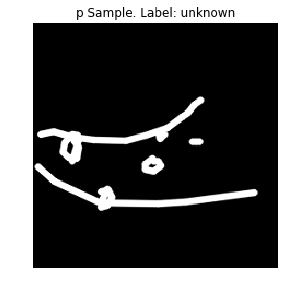

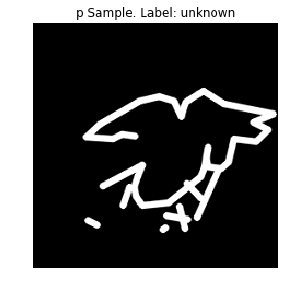

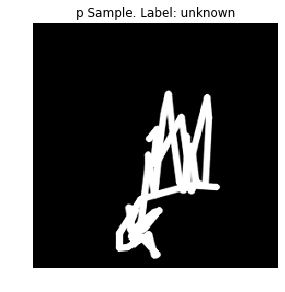

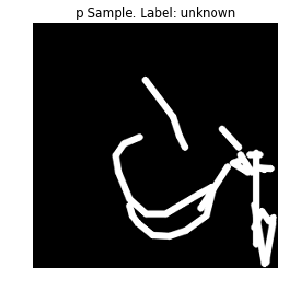

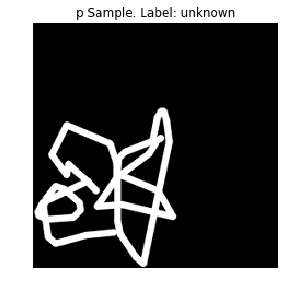

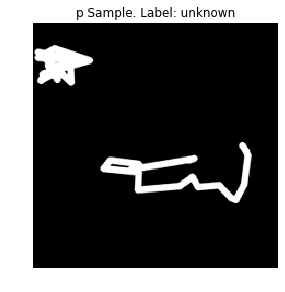

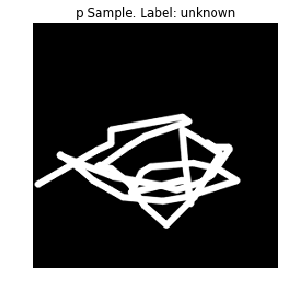

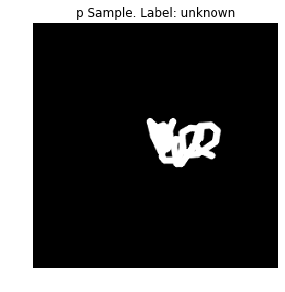

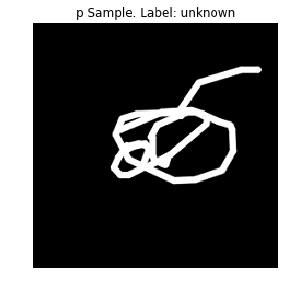

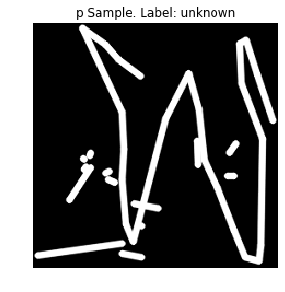

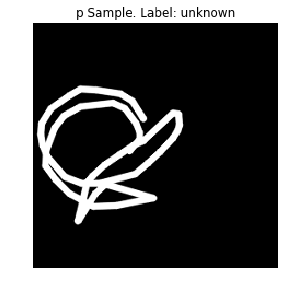

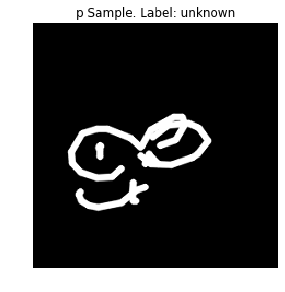

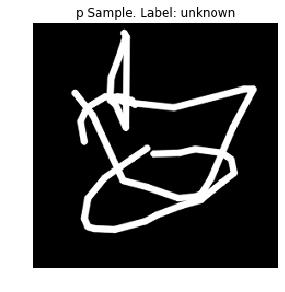

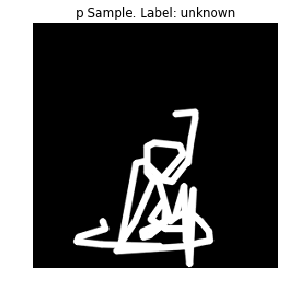

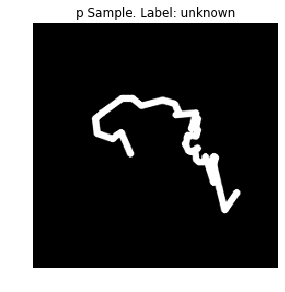

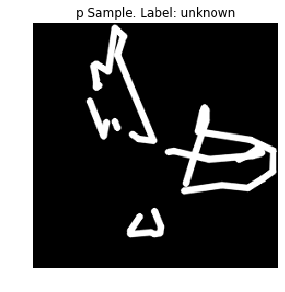

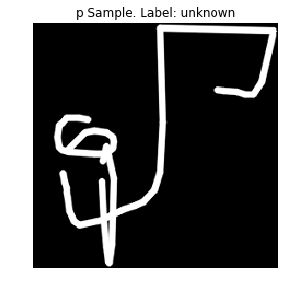

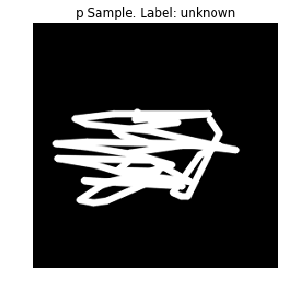

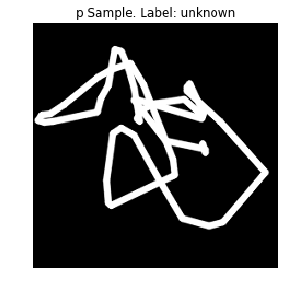

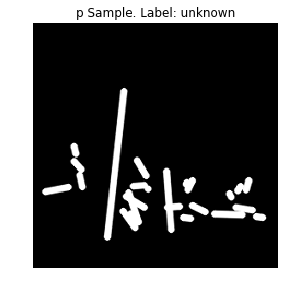

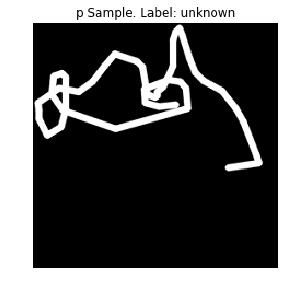

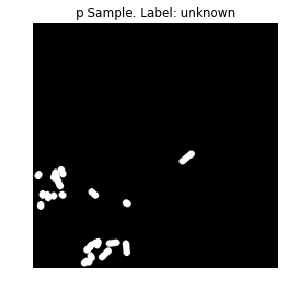

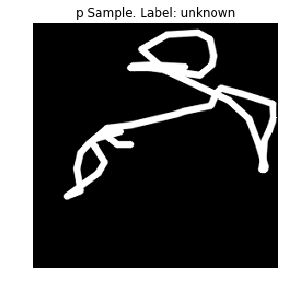

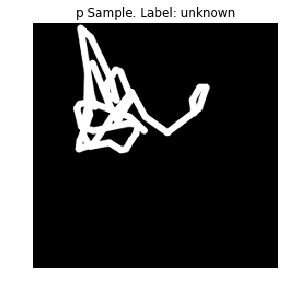

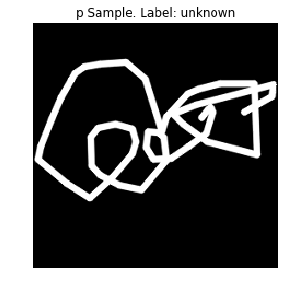

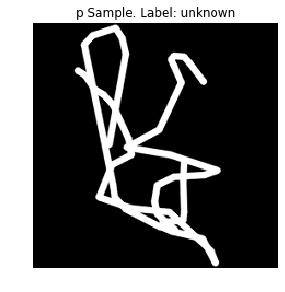

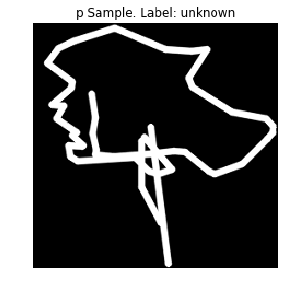

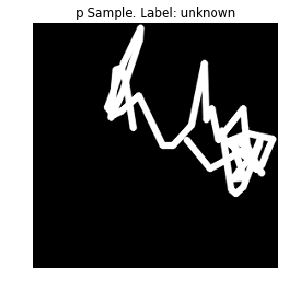

In [6]:
draw_sketches(plengths, psketch_coord, [-1]*30, plot_title='p Sample')